Stem words (using Porter stemmer) and insert words from docs into inverted index

In [1]:
import os
import nltk
from nltk.stem import PorterStemmer
from InvertedIndex import InvertedIndex #Custom library

docs_path = '../Dataset/docs/'
docs_list = os.listdir(docs_path)

invertedIndex = InvertedIndex()
ps = PorterStemmer()

for doc_name in docs_list:
    file_path = os.path.join(docs_path, doc_name)
    doc = open(file_path)
    for word in doc:
        invertedIndex.insert(ps.stem(word[:-1].lower()), doc_name)

Filter inverted index words using stopwords and replace words with synonyms

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stopwords = stopwords.words('english')

for word in stopwords:
    invertedIndex.delete(word)

[nltk_data] Downloading package stopwords to /home/greg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Plot word frequency distribution in filtered inverted index

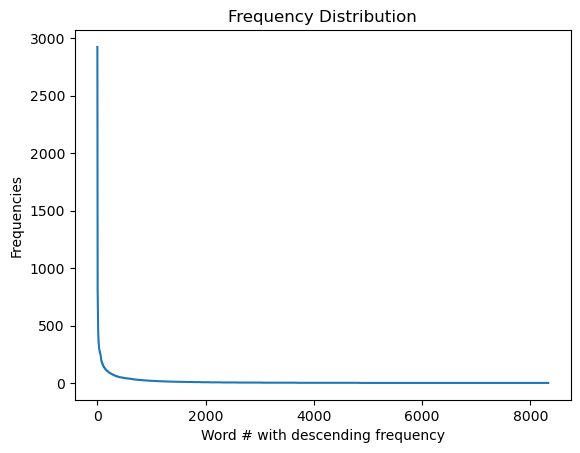

In [3]:
import operator
import matplotlib.pyplot as plt

def plotFrequencyDistribution():
    wordFrequencies = {}
    for word, data in invertedIndex.getWords():
       wordFrequencies[word] = invertedIndex.countOccurances(word) 
    wordFrequencies = dict(sorted(wordFrequencies.items(), key=operator.itemgetter(1),reverse=True))
    plt.plot(range(len(list(wordFrequencies.values()))), list(wordFrequencies.values()))
    plt.title('Frequency Distribution')
    plt.xlabel('Word # with descending frequency')
    plt.ylabel('Frequencies')
    plt.show()
    return wordFrequencies

wordFrequencies = plotFrequencyDistribution()

Considering Zipf's law, as you can see, very few words are very frequent and the rest is very infrequent. 

Thus I decided to remove very frequet words, that appear on mostly every document, since I don't want the information retrieval system to focus on those when computing answers to queries.

I also replaced infrequent words with synonyms, hoping that the synonyms would have a higher frequency in the docs, so that by doing the same replacements in the query words the answers of the infrequent words will be grouped with their synonyms.

I set the thresholds for the frequent word removal and the infrequent word replacement so that when later plotting the Frequency Distribution graph again, I will only have the "knee" of the currrent graph. This is an emperical rule to make sure that we don't have many very frequent or very infrequent words in the inverted index

In [4]:
from nltk.corpus import wordnet
nltk.download('wordnet')
word_replacements = {}

#Remove frequent words
for word, frequency in wordFrequencies.items():
    if(frequency > 100):
        invertedIndex.delete(word)
    else:
        break
        
#Replace infrequent words with synonyms
for word, frequency in reversed(wordFrequencies.items()):        
    if(frequency < 15):
        synonyms = wordnet.synsets(word)
        for synonym in synonyms:
            new_word = ps.stem(synonym.lemmas()[0].name())
            if new_word != word and '_' not in new_word:
                invertedIndex.rename(word, new_word) 
                word_replacements[word] = new_word
                break
    else:
        break

[nltk_data] Downloading package wordnet to /home/greg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Now i plot the frequency distribution again in order to evaluate what it looks like

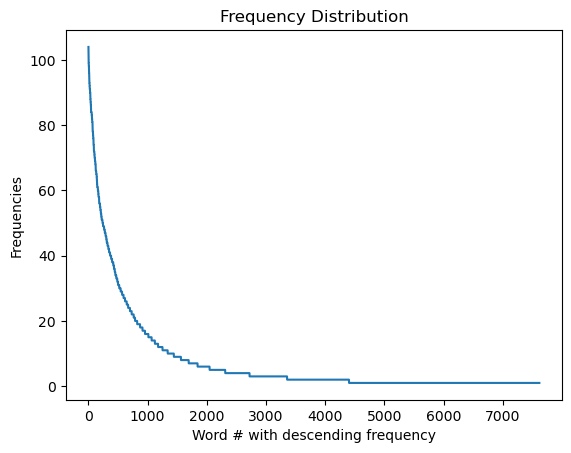

In [5]:
wordFrequencies = plotFrequencyDistribution()

It is visible now that we are left with the "knee" of the original frequency distribution, so all very frequent and all very infrequent words are removed